In [33]:
from test import EigenData
import numpy as np
import scipy.io
import h5py
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch
%matplotlib inline

In [34]:
data = EigenData()
eigenworms = data.get_eigenworms('EigenWorms.mat')

footage = data.get_footage('20150814-All-PNAS2011-DataStitched .mat')
newdata = torch.rand(33600,5)
for k in footage.keys():
    print(k, footage[k].shape)
    arr1=footage[k]

    arr2=arr1[:5,]

    r = data.reconstruct(footage[k])
    print('-->', r.shape)
    dataset1 = arr2.transpose()

    newdata = np.concatenate((newdata,dataset1),axis=0)
newdata = newdata[33600:,]
print(newdata.shape)

b (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
c (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
d (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
e (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
f (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
g (6, 33600)
(100, 6) (6, 33600)
--> (100, 33600)
h (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
i (6, 33600)
(100, 6) (6, 33600)
--> (100, 33600)
j (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
k (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
l (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
m (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
(403200, 5)


In [35]:
first_5_eigenworms = eigenworms[0:5,:]
eig_worm_0 = eigenworms[0,:]
eig_worm_1 = eigenworms[1,:]
eig_worm_2 = eigenworms[2,:]
eig_worm_3 = eigenworms[3,:]
eig_worm_4 = eigenworms[4,:]

In [36]:
data1=newdata[~np.isnan(newdata).any(axis=1)]
data1 = data1.astype('float32')
print(data1.shape)
print(len(data1))

(386422, 5)
386422


In [37]:
data1[40:55,]

array([[ 1.4645884 ,  3.4350185 , -5.5496044 ,  1.8299438 ,  0.2387301 ],
       [ 3.377423  ,  2.5875947 , -5.2607303 ,  1.8659543 ,  0.19665092],
       [ 5.0932016 ,  1.3529874 , -4.732354  ,  1.8260412 ,  0.26309967],
       [ 6.3521743 , -0.17350073, -3.998286  ,  1.722896  ,  0.30742615],
       [ 7.0038657 , -1.8698727 , -3.1179302 ,  1.530652  ,  0.23766   ],
       [ 7.0084405 , -3.5411313 , -2.1807349 ,  1.2613432 ,  0.07158714],
       [ 6.4451785 , -5.030563  , -1.2584879 ,  0.9667093 , -0.12454028],
       [ 5.450592  , -6.2310553 , -0.4163002 ,  0.6915617 , -0.30707514],
       [ 4.1618834 , -7.0865927 ,  0.3005985 ,  0.45112544, -0.45510176],
       [ 2.6900473 , -7.5774584 ,  0.88540673,  0.25624517, -0.534884  ],
       [ 1.0945239 , -7.7054977 ,  1.3633162 ,  0.13241863, -0.53531665],
       [-0.6012438 , -7.478858  ,  1.775028  ,  0.1014748 , -0.47314036],
       [-2.2966528 , -6.900022  ,  2.1227376 ,  0.15076222, -0.405593  ],
       [-3.8898995 , -5.984214  ,  2.3

In [38]:
scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(data1)

In [39]:
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [40]:
data_X, data_Y = create_dataset(data1)

print(data_X.shape)
print(data_Y.shape)

(386417, 5, 5)
(386417, 5)


In [41]:
train_size = int(len(data_X) * 0.8)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(309133, 5, 5)
(309133, 5)
(77284, 5, 5)
(77284, 5)


In [42]:
# reshape input to be [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 5, train_X.shape[2]))
test_X = np.reshape(test_X, (test_X.shape[0], 5, test_X.shape[2]))

print(train_X.shape)
print(train_Y.shape)

(309133, 5, 5)
(309133, 5)


In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input,LSTM,Dropout,Dense



# create and fit the LSTM network

model = keras.Sequential()
model.add(LSTM(260,input_shape=(5,5),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(260,input_shape=(5,5),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(260,input_shape=(5,5),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(260,input_shape=(5,5),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(5,activation='linear'))
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(train_X, train_Y, epochs=10, batch_size=512, verbose=2, validation_data=(test_X, test_Y))

Epoch 1/10
604/604 - 157s - loss: 0.0097 - root_mean_squared_error: 0.0984 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0418
Epoch 2/10
604/604 - 149s - loss: 0.0025 - root_mean_squared_error: 0.0496 - val_loss: 8.7772e-04 - val_root_mean_squared_error: 0.0296
Epoch 3/10
604/604 - 147s - loss: 0.0015 - root_mean_squared_error: 0.0388 - val_loss: 3.5200e-04 - val_root_mean_squared_error: 0.0188
Epoch 4/10
604/604 - 146s - loss: 0.0012 - root_mean_squared_error: 0.0341 - val_loss: 6.9219e-04 - val_root_mean_squared_error: 0.0263
Epoch 5/10
604/604 - 144s - loss: 9.6699e-04 - root_mean_squared_error: 0.0311 - val_loss: 9.7226e-04 - val_root_mean_squared_error: 0.0312
Epoch 6/10
604/604 - 145s - loss: 8.4642e-04 - root_mean_squared_error: 0.0291 - val_loss: 2.5474e-04 - val_root_mean_squared_error: 0.0160
Epoch 7/10
604/604 - 143s - loss: 7.4983e-04 - root_mean_squared_error: 0.0274 - val_loss: 3.9262e-04 - val_root_mean_squared_error: 0.0198
Epoch 8/10
604/604 - 145s - loss: 6.7960

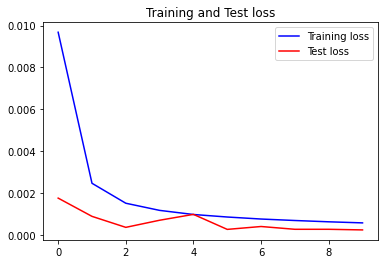

In [44]:
epochs=range(len(history.history['loss']))
plt.figure()
plt.plot(epochs,history.history['loss'],'b',label='Training loss')
plt.plot(epochs,history.history['val_loss'],'r',label='Test loss')
plt.title('Training and Test loss')
plt.legend()
plt.show()

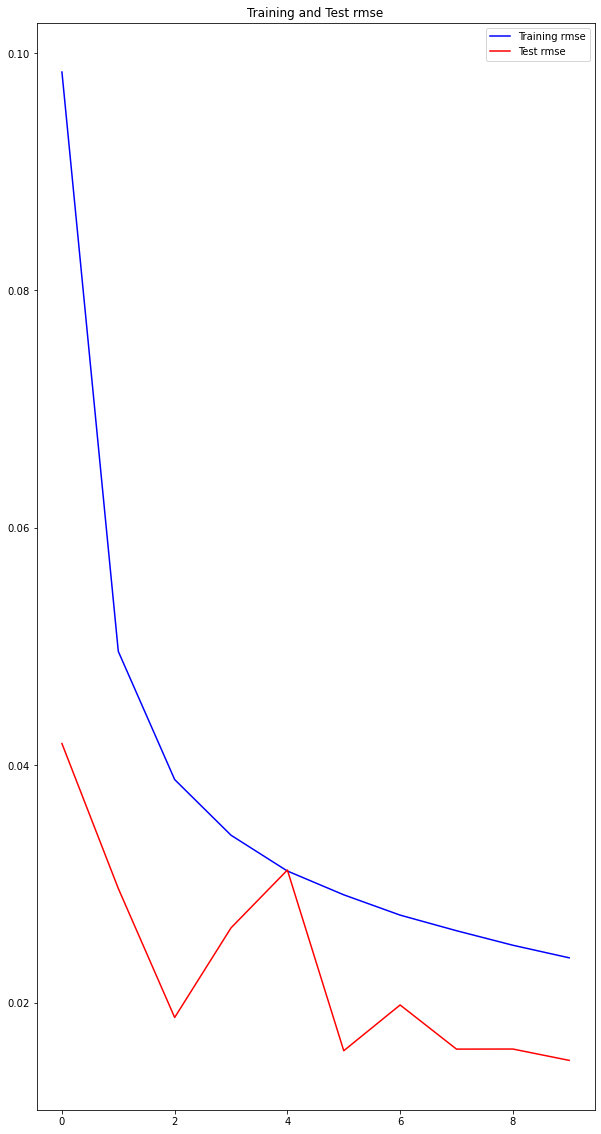

In [59]:
epochs=range(len(history.history['root_mean_squared_error']))
plt.figure()
plt.plot(epochs,history.history['root_mean_squared_error'],'b',label='Training rmse')
plt.plot(epochs,history.history['val_root_mean_squared_error'],'r',label='Test rmse')
plt.title('Training and Test rmse')
plt.legend()
plt.show()

In [46]:
testPredict = model.predict(test_X)

In [47]:
print(testPredict.shape)
print(test_Y.shape)

(77284, 5)
(77284, 5)


In [49]:
testScore = sqrt(mean_squared_error(test_Y, testPredict))
print('Test Score: %.5f RMSE' % (testScore))

Test Score: 0.01515 RMSE


In [50]:
newtestPredict = scaler.inverse_transform(testPredict)
newtest_Y = scaler.inverse_transform(test_Y)

In [51]:
print(newtestPredict.shape)
print(newtest_Y.shape)

(77284, 5)
(77284, 5)


In [57]:
testScore = sqrt(mean_squared_error(newtest_Y, newtestPredict))
print('Test Score: %.5f RMSE' % (testScore))

Test Score: 0.56471 RMSE


In [55]:
length = 2500
vmin = -0.65
vmax = 0.35
#3300
start = 5000
slc = slice(start,start+length)
start_of_test = 309133

<ipython-input-56-3a3c3ad18a99>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout(pad=2.0)


<Figure size 432x288 with 0 Axes>

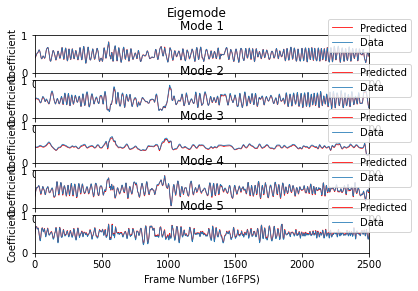

In [56]:
def plot_coefficient_reconstruction(model, X, Y):
    plt.clf()
    fig, axarr = plt.subplots(5, 1)
    for coeff_idx in range(7):
        if(coeff_idx == 0):
            i = 0
        elif(coeff_idx == 1):
            i = 1
        elif(coeff_idx == 2):
            i = 2
        elif(coeff_idx == 3):
            i = 3
        elif(coeff_idx == 4):
            i = 4
        else:
            break
        s=1.
        lw = .8
        MAX = 100000

        prediction_raw_sample = model.predict(X)[0:MAX][:,coeff_idx]
        Y_raw_sample = Y[0:MAX][:,coeff_idx]
        predictions = prediction_raw_sample


        axarr[i].plot((predictions), label="Predicted", c="red", linewidth=lw)
        axarr[i].plot(Y_raw_sample[:], label="Data", linewidth=lw)
        axarr[i].title.set_text("Mode " + str(coeff_idx+1))
        axarr[i].set_ylim([0,1])
        axarr[i].set_xlim([0,length])
        axarr[i].set_xlabel("Frame Number (16FPS)")
        axarr[i].set_ylabel("Coefficient")
        axarr[i].axvline(x=start_of_test, ymin=0, ymax=100, linewidth=1, color='k')



        axarr[i].legend(fontsize=10,bbox_to_anchor=(1, 1),loc='center')

    plt.rcParams['figure.figsize'] = 10,20
    plt.tight_layout(pad=2.0)
    plt.suptitle("Eigemode")
    plt.show()
plot_coefficient_reconstruction(model, test_X[start:start+length], test_Y[start:start+length])

<Figure size 720x1440 with 0 Axes>

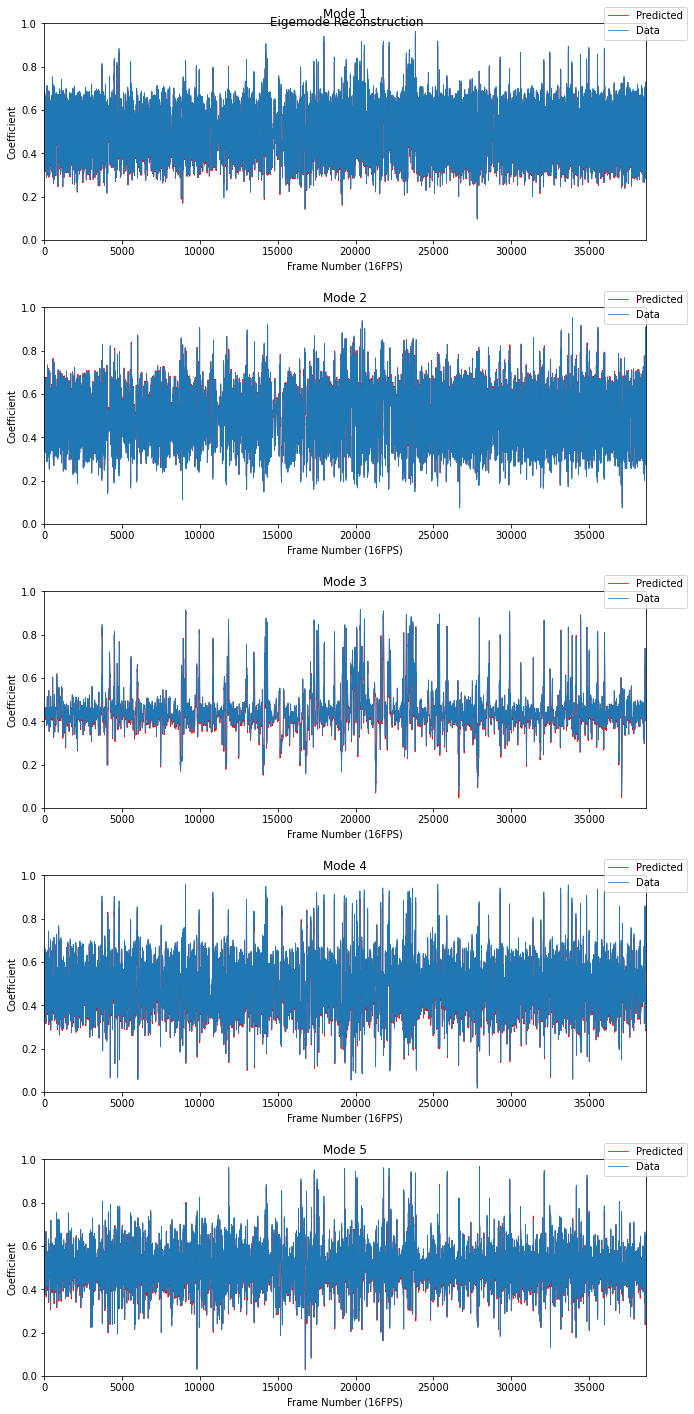

In [33]:
def plot_coefficient_reconstruction(model, X, Y):
    plt.clf()
    fig, axarr = plt.subplots(5, 1)
    for coeff_idx in range(7):
        if(coeff_idx == 0):
            i = 0
        elif(coeff_idx == 1):
            i = 1
        elif(coeff_idx == 2):
            i = 2
        elif(coeff_idx == 3):
            i = 3
        elif(coeff_idx == 4):
            i = 4
        else:
            break
        s=1.
        lw = .8
        MAX = 100000
        #print(X.shape)
        prediction_raw_sample = model.predict(X)[0:MAX][:,coeff_idx]
        Y_raw_sample = Y[0:MAX][:,coeff_idx]
        predictions = prediction_raw_sample

        #print(predictions.shape)
        #plt.scatter(np.arange(0,Y_raw_sample.shape[0],1), (predictions), s=s, label="Prediction")
        #plt.scatter(np.arange(0,Y_raw_sample.shape[0],1), Y_raw_sample[0:], s=s, label="Real")
        axarr[i].plot((predictions), label="Predicted", c="red", linewidth=lw)
        axarr[i].plot(Y_raw_sample[:], label="Data", linewidth=lw)
        axarr[i].title.set_text("Mode " + str(coeff_idx+1))
        axarr[i].set_ylim([0,1])
        axarr[i].set_xlim([0,38642])
        axarr[i].set_xlabel("Frame Number (16FPS)")
        axarr[i].set_ylabel("Coefficient")
        axarr[i].axvline(x=start_of_test, ymin=0, ymax=100, linewidth=1, color='k')


#         axarr[i,j].legend(loc="upper right")
        axarr[i].legend(fontsize=10,bbox_to_anchor=(1, 1),loc='center')
#     plt.figlegend( )
    plt.rcParams['figure.figsize'] = 10,10
    plt.tight_layout(pad=2.0)
    plt.suptitle("Eigemode Reconstruction")
    plt.show()
plot_coefficient_reconstruction(model, test_X, test_Y)